# Assignment 0: Setup Test

Run this notebook to show us that you have successfully installed the libraries you need for this course.

If you get errors that you cannot solve, you're welcome to contact the TAs for help.

## Important Note

**There is a Q&A session on Wednesday the 7th of November 8:15-10:00 in Theatrum visuale.** Everyone is free to attend and ask any questions regarding the setup process, Python, and/or the libraries we use.

In [1]:
import hashlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import torch
import imageio.v3 as iio
import furhat_remote_api
from transformers import AutoModel, AutoImageProcessor
from PIL import Image
from google import genai
import cv2
from openface.face_detection import FaceDetector

c:\Users\Daan\Projects\uu-intelligent-interactive-systems-25-26\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Your Name

Is all we need today. Just write your own name between the quote marks (`"`) below:

In [2]:
NAME =  "Daan Brugmans"

## Let it Run

Did you already write your name above? Good! Then all you have to do is run the rest of the notebook, and write down some data for us.

In [3]:
def munch_name(name: str) -> int:
    """Returns a stable hash of `name`, as an unsigned 64 bit integer."""
    clean_name = name.strip().title().encode("utf-8") # Normalize name format and encode.
    md5_hash = int(hashlib.md5(clean_name).hexdigest(), 16) # Use MD5 to obtain a 128-bit signed integer hash.
    clamped_hash = (md5_hash % 0xffff_ffff_ffff_ffff) # Clamp it to 64-bit unsigned integer range.
    return clamped_hash

In [4]:
magic = munch_name(NAME)

high_magic = (magic >> 32) # Upper 32 bits. Used to seed the NumPy random number generator.
low_magic = (magic & 0xff_ff_ff_ff) # Lower 32 bits. Used to seed the PyTorch random number generator.

print(f"Magic: 0x{magic:019_X}")

Magic: 0xABFE_4F03_58A0_72D3


In [6]:
rng = np.random.default_rng(seed=high_magic)
print(f"Your lucky number is: {rng.integers(100)}")

Your lucky number is: 90


In [7]:
torch.random.manual_seed(seed=low_magic)
print(f"Your cursed number is: {torch.randint(low=0, high=100, size=())}")

Your cursed number is: 62


### Robert De Niro Fan Club

Let's take a look at his movies!

In [8]:
data = pd.read_csv("de-niro.csv", skipinitialspace=True)
data

,Year,Score,Title
0,1968,86,Greetings
1,1970,17,Bloody Mama
2,1970,73,"Hi, Mom!"
3,1971,40,Born to Win
4,1973,98,Mean Streets
...,...,...,...
82,2014,9,The Bag Man
83,2015,60,Joy
84,2015,26,Heist
85,2015,61,The Intern


In [9]:
shortest_title = data.loc[data["Title"].str.len().argmin(), "Title"]
longest_title = data.loc[data["Title"].str.len().argmax(), "Title"]

print(f"Shortest Title: \"{shortest_title}\"\nLongest  Title: \"{longest_title}\"")

Shortest Title: "Joy"
Longest  Title: "Dear America: Letters Home From Vietnam"


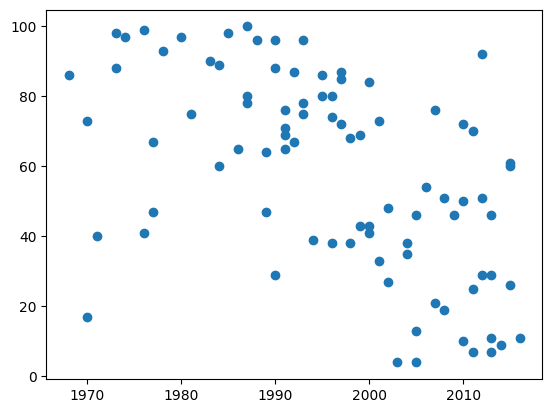

In [10]:
X = data["Year"].to_numpy().reshape(-1, 1)
y = data["Score"].to_numpy()

plt.plot(X, y, "o")

pass

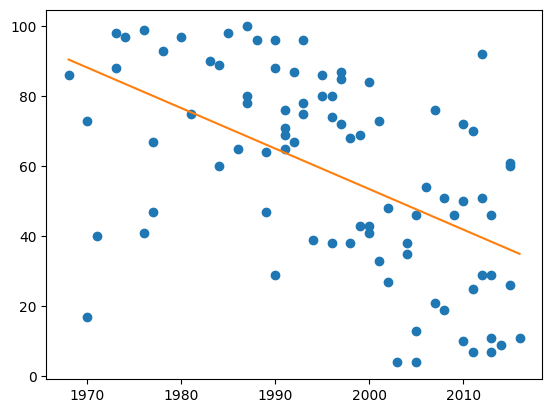

In [11]:
reg = LinearRegression()
reg.fit(X, y)

plt.plot(X, y, "o")
plt.plot(X, reg.predict(X))

pass

In [12]:
print(f"The De Niro parameter: {reg.coef_.item():.03}")

The De Niro parameter: -1.16


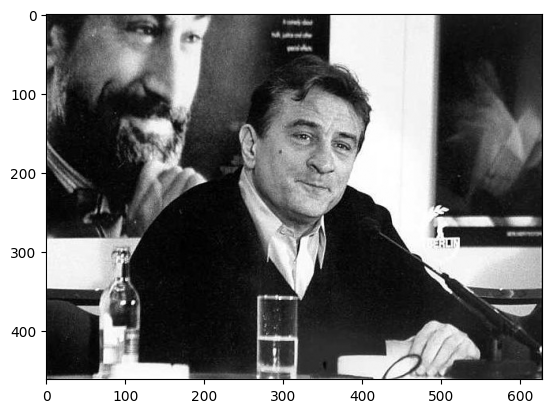

In [13]:
picture = iio.imread("de-niro.jpg")
plt.imshow(picture, cmap="gray")

### Openface Module Test

OpenFace is a package with some pre-trained models usable for computer vision. We will use it in further assignments.
The code below will load RetinaFace model (which should appear after you have executed openface download command in your environment) and print the coordinates of a face in handshake.jpg image

In [29]:
def first_face_coords(image_path, device='cpu'):
    dets = FaceDetector("./weights/Alignment_RetinaFace.pth", device).get_face(image_path)[1]
    return list(map(int, dets[0][:4]))  # [x1, y1, x2, y2]

# Example:
print("Face coordinates:",first_face_coords("handshake.jpg"))

Loading pretrained model from ./weights/Alignment_RetinaFace.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:300
Face coordinates: [219, 187, 287, 281]


# (Down)load DINOv3
DINOv3 is a general purpose vision model from Meta. In this course, we will use it for affect recognition but it's representative power goes well beyond that. To download DINO, you **need to request access**. You will probably receive instant access but using your institutional email can help the process. Once you get access through HuggingFace, you need to login with:
```bash
hf auth login
```

In [32]:
# smallest dino model
pretrained_model_name = "facebook/dinov3-vits16plus-pretrain-lvd1689m"
model = AutoModel.from_pretrained(pretrained_model_name, device_map="cpu")

# preprocess images before feeding them to the model
processor = AutoImageProcessor.from_pretrained(pretrained_model_name)
# set model in inference mode
model.eval()

with torch.inference_mode():
    image = Image.fromarray(picture)
    inputs = processor(images=[image], return_tensors="pt")
    outputs = model(**inputs)
    # this is the cls token, can be used for classifying the image
    cls_token = outputs.last_hidden_state[:, 0, :]
    print(f"Image representation shape: {cls_token.shape}")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


Image representation shape: torch.Size([1, 384])


## Evaluation

Please send us the following data in the corresponding Studium page:

* Your **NAME**, exactly as you wrote it above.
* Your **lucky number**.
* Your **cursed number**.
* Robert De Niro's **shortest movie title**.
* The **De Niro parameter**.
* **Facial coordinates** obtained with OpenFace
* The shape of the **image representation**.